# Figure 2 Notebook


### Fig. 2B-D Isolated cell firing, cell firing during simulation, periodic depolarizations

In [ ]:
%matplotlib inline
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### FIGURE SETUP for Figure 2B###

#Set-up the entire figure
fig = plt.figure(constrained_layout=False, figsize=(5.5, 3.6))

#Declare size of subplots
widths = [1, 3.5]
heights = [1,1,1 , 0.35, 1]
gs = fig.add_gridspec(nrows=5, ncols=2, width_ratios=widths, height_ratios=heights)

#Declare color maps that will be used in the figure
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

#Declare standard line length and widths
LINELENGTH = 0.5
LINEWIDTH = 0.75
plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'
#Declare font size standards
SMALLER_SIZE = 5
SMALL_SIZE = 6
FONT_STYLE = 'bold'

# x range for step current response
x_start = 600
x_end = 5400

# x range for coiling simulation
xstart = 5000
xend = 15000

### END OF FIGURE SETUP ###

#FIRST, GRAPH VOLTAGE TRACES IN RESPONSE TO CURRENT STEPS

from Izhikevich_class import*
from random import *
from Analysis_tools import *

tmax = 51000
dt = .1
nmax = int(tmax/dt)

 ## This model is based on Izhikevich neuron type:

#Increasing a makes the after current-step repolarization faster
#Increasing b depolarizes the resting membrane potential
#Decreasing d slows the return to rest (or complete inactivation of spking) during a step current.
#    Increasing d decreases the f-i slope
# b is inversely related to the input resistance
# a*b is related to the rate of the after current-step repolarization
# 

#Declare the parameters of the motoneuron
nrn = Izhikevich_9P(a=0.5,b=0.1,c=-50, d=0.2, vmax=10, vr=-60, vt=-45, k=0.05, Cm = 20, dt=dt, x=5.1+1.6,y=-1)

Time = [dt*t for t in range(nmax)]

#Add the motoneuron response subplot
fig_MN_firing = fig.add_subplot(gs[0, 0])

All_V_nrn = []
All_spike_times = []
All_inst_freq = []

#parameters for motoneuron stimulation
Min_current = 4
Max_current = 6
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    #res_nrn = nrn.getNextVal(-70., -14., -70.)
    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
    
    #Simulate motoneuron response
    for t in Time:

        if (t>1000)&(t<5000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    
    # plot the motoneuron response
    fig_MN_firing.plot(Time, V_nrn, c=cmapRed(0.6))

#Set-up the figure    
fig_MN_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_firing.set_ylim([-70,30]) #y-axis limits

#Which borders to display
fig_MN_firing.spines['top'].set_visible(False)
fig_MN_firing.spines['right'].set_visible(False)
fig_MN_firing.spines['bottom'].set_visible(False)
fig_MN_firing.spines['left'].set_visible(False)

#set up ticks to display
fig_MN_firing.tick_params(axis='both', which='both', length=0)
fig_MN_firing.set_xticks([i*2000 for i in range(0,0)])
fig_MN_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_firing.title, fig_MN_firing.yaxis.label] +
         fig_MN_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_firing.set_xlim([x_start,x_end])

#Plot IC response to current stim.  Set-up is similar to MN response
nrn = Izhikevich_9P(a=0.0005,b=0.5,c=-30, d=5, vmax=0, vr=-60, vt=-45, k=0.05, Cm = 50, dt=dt, x=5.1+1.6,y=-1)
fig_IC_firing = fig.add_subplot(gs[1, 0]) 

Min_current = 40
Max_current = 42
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    #res_nrn = nrn.getNextVal(-70., -14., -70.)
    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<5000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    
    fig_IC_firing.plot(Time, V_nrn, c=cmapBrown(0.9))
            
fig_IC_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_IC_firing.set_ylim([-80,20])
fig_IC_firing.spines['top'].set_visible(False)
fig_IC_firing.spines['right'].set_visible(False)
fig_IC_firing.spines['bottom'].set_visible(False)
fig_IC_firing.spines['left'].set_visible(False)
fig_IC_firing.tick_params(axis='both', which='both', length=0)
fig_IC_firing.set_xticks([i*2000 for i in range(0,0)])
fig_IC_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_IC_firing.title, fig_IC_firing.yaxis.label] +
         fig_IC_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_IC_firing.set_xlim([x_start,x_end])


#Plot V0d response  to current stim.  Set-up is similar to MN response
nrn = Izhikevich_9P(a=0.5,b=0.01,c=-50, d=0.2, vmax=10, vr=-60, vt=-45, k=0.05, Cm = 20, dt=dt, x=5.1+1.6,y=-1)
fig_V0d_firing = fig.add_subplot(gs[2, 0]) 

Min_current = 4
Max_current = 6
Current_step = 2
num_steps = Max_current/Current_step
# Determine the size of the current steps
for stim_ in np.arange(Min_current, Max_current, Current_step):

    ## ODE Solving (Time loop)

    #res_nrn = nrn.getNextVal(-70., -14., -70.)
    res_nrn = nrn.getNextVal(-70., -14, -70.)

    V_nrn = []
    All_V_nrn.append([])
    All_spike_times.append([])
    All_inst_freq.append([])
        
    for t in Time:

        if (t>1000)&(t<5000):
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], stim_)
        else:
            res_nrn = nrn.getNextVal(res_nrn[0],res_nrn[1], 0)

        V_nrn.append(res_nrn[0])
        All_V_nrn[-1].append(res_nrn[0])
    
    fig_V0d_firing.plot(Time, V_nrn, c=cmapGreen(0.6))
            
fig_V0d_firing.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0d_firing.set_ylim([-70,30])
fig_V0d_firing.spines['top'].set_visible(False)
fig_V0d_firing.spines['right'].set_visible(False)
fig_V0d_firing.spines['bottom'].set_visible(False)
fig_V0d_firing.spines['left'].set_visible(False)
fig_V0d_firing.tick_params(axis='both', which='both', length=0)
fig_V0d_firing.set_xticks([i*2000 for i in range(0,3)])
fig_V0d_firing.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_V0d_firing.title, fig_V0d_firing.yaxis.label] +
         fig_V0d_firing.get_xticklabels() + fig_V0d_firing.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0d_firing.set_xlim([x_start,x_end])
fig_V0d_firing.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')


### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION. I.E. FIGURE 2C ###

### First, read data file

read_data = pd.read_csv("Single_coiling_Stim50_left_side_only.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

#List MNs, ICs, and V0ds to display.
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [0,2,4] 
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

# Declare min and max of y-axis
lower_y = -70
upper_y = 20

# Add subplots for plotting MN, IC and V0d activity
fig_MN_activity = fig.add_subplot(gs[0, 1])
fig_IC_activity = fig.add_subplot(gs[1, 1])
fig_V0d_activity = fig.add_subplot(gs[2, 1])

# plotting motoneuron traces
for k in list_MNs:
    lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_MN_activity.plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
leg=fig_MN_activity.legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# set-up MN plot
fig_MN_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_activity.set_ylim([lower_y, upper_y]) #y-axis limits
# Set up borders to display
fig_MN_activity.spines['top'].set_visible(False)
fig_MN_activity.spines['right'].set_visible(False)
fig_MN_activity.spines['bottom'].set_visible(False)
fig_MN_activity.spines['left'].set_visible(False)

#set-up ticks
fig_MN_activity.tick_params(axis='both', which='both', length=0)
fig_MN_activity.set_xticks([i*5000 for i in range(0,0)])
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
         fig_MN_activity.get_xticklabels() + fig_MN_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_activity.set_xlim([xstart, xend])
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting IC traces. Set-up similar to MN
for k in list_ICs:
    lines_left, = fig_IC_activity.plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_IC_activity.plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=fig_IC_activity.legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_IC_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_IC_activity.set_ylim([lower_y, upper_y])
fig_IC_activity.spines['top'].set_visible(False)
fig_IC_activity.spines['right'].set_visible(False)
fig_IC_activity.spines['bottom'].set_visible(False)
fig_IC_activity.spines['left'].set_visible(False)
fig_IC_activity.tick_params(axis='both', which='both', length=0)
fig_IC_activity.set_xticks([i*5000 for i in range(0,0)])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_IC_activity.title, fig_IC_activity.xaxis.label, fig_IC_activity.yaxis.label] +
         fig_IC_activity.get_xticklabels() + fig_IC_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_IC_activity.set_xlim([xstart, xend])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting V0d traces. Set-up similar to MN
for k in list_V0ds:
    lines_left, = fig_V0d_activity.plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0d_activity.plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
leg=fig_V0d_activity.legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0d_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0d_activity.set_ylim([lower_y, upper_y])
fig_V0d_activity.spines['top'].set_visible(False)
fig_V0d_activity.spines['right'].set_visible(False)
fig_V0d_activity.spines['bottom'].set_visible(False)
fig_V0d_activity.spines['left'].set_visible(False)
fig_V0d_activity.tick_params(axis='both', which='both', length=0)
for item in ([fig_V0d_activity.title, fig_V0d_activity.xaxis.label, fig_V0d_activity.yaxis.label] +
         fig_V0d_activity.get_xticklabels() + fig_V0d_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0d_activity.set_yticks([i*50 + -50 for i in range(0,2)])
fig_V0d_activity.set_xticks([i*5000 for i in range(0,5)])
fig_V0d_activity.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
fig_V0d_activity.set_xlim([xstart, xend])



### Now plot Figure 2D ###
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### FIGURE SETUP for Figure 2D ###

#First read data file
read_data = pd.read_csv("Single_coiling_Stim50_left_side_only_hyperpolarized_VLMN.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

# Declare min and max of x-axis
xstart = 0
xend = TIME_END

# Declare min and max of y-axis
lower_y = -80
upper_y = -20

# Add a subplot for hyperpolarized MN trace 
fig_MN_activity = fig.add_subplot(gs[-1, 0:2])

# plotting left motoneuron traces
for k in range (5, 6):
    lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# set-up MN graph
fig_MN_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_activity.set_ylim([lower_y, upper_y]) #y-axis limits
# set-up the borders of the plot
fig_MN_activity.spines['top'].set_visible(False)
fig_MN_activity.spines['right'].set_visible(False)
fig_MN_activity.spines['bottom'].set_visible(False)
fig_MN_activity.spines['left'].set_visible(False)

#set-up the ticks 
fig_MN_activity.tick_params(axis='both', which='both', length=0)
for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
        fig_MN_activity.get_xticklabels()+ fig_MN_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_activity.set_yticks([i*40 + -70 for i in range(0,2)]) # y-axis ticks
fig_MN_activity.set_xticks([i*2500 for i in range(0,10)]) # x-axis ticks
fig_MN_activity.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold') #x-axis label
fig_MN_activity.set_xlim([xstart, xend]) #x-axis limits

### Plot the whole figure
plt.subplots_adjust(wspace = 0.3, hspace = 0.1)
plt.savefig("Single_coiling_steps_and_activity.png", dpi=1000) #Save figure
plt.show()

### Fig. 2E - Phase delay

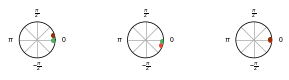

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# let's define useful functions in this cell

### Load data using path to your data
data = pd.read_csv('Single_coiling_Stim50_left_side_only.csv', index_col=0)

mask_R = np.asarray([x.split('_')[0] == 'Right' for x in data.columns])
mask_L = np.asarray([x.split('_')[0] == 'Left' for x in data.columns])

data_R = data.T[mask_R].T
data_L = data.T[mask_L].T

mask_dict_R = {}
mask_dict_L = {}
for cell_type in ['MN', 'IC', 'V0d']:
    mask_type_R = np.asarray([cell_type in x for x in data_R.columns])
    mask_dict_R[cell_type] = mask_type_R
    mask_type_L = np.asarray([cell_type in x for x in data_L.columns])
    mask_dict_L[cell_type] = mask_type_L
    
from Analysis_tools import *

# Function to extract specific traces
def get_traces(data, mask_dict, lbl, corr_idx = 0):
    
    side = data.columns[0].split('_')[0]
    dat_ = data.T[mask_dict[lbl]].T
    dict_ = {x : int(x.replace('_'.join([side,lbl]), '')) + corr_idx for x in dat_.columns}
    dat_ = dat_.rename(dict_,axis=1)
    order_ = np.arange(len(dat_.columns))
    
    return dat_.reindex(order_, axis=1)

# Function to compute the phase in radians, in absolute time and the max cross-correlation value
def compute_tmax(trace_1, trace_2, lim_t=3000, dt=0.1): #lim_t = 3000 because coiling period is greater than 1000 ms
    trace_1 = trace_1 - mean(trace_1) # baseline adjust trace 1
    trace_2 = trace_2 - mean(trace_2) # baseline adjust trace 2
    Xc_res = Xcorr_LR(trace_1, trace_2) # calculate cross correlation of trace 1 and 2
    N = int(len(Xc_res)/2)
    Xc_res = Xc_res[int(N-lim_t/dt):int(N+lim_t/dt)] #Bound the cross-correlation to a smaller range of time delays
    time_delay = np.arange(-lim_t, lim_t, dt)

    Xa_res = autocorr(trace_1) #calculate autocorrelation of trace 1
    Xa_res = Xa_res[int(1000/dt):int(lim_t/dt)]  #lower bound of 1000 because coiling period is greater than 1000 ms
    time_delay_a = np.arange(1000, lim_t, dt)

    idx = np.where(Xc_res == np.max(Xc_res))[0][0] #calculate at what time delay is the max of the cross-correlation

    duration_single_coiling = 1074 # as determined in the block of code below
    
    Xc_max = round(np.max(Xc_res), 4) # calculate the value of the max cross correlation
    t_max = round(time_delay[idx], 2) #calculate the value of the phase delay
    t_max_rad = round(2*np.pi * t_max / duration_single_coiling, 4) #calculate the phase delay in radians
    
    return t_max_rad, t_max, Xc_max

#let's compute the phase delay of interests in radians

lbl_list = ['MN', 'IC', 'V0d'] # list of cell names

phase_delay_ipsi_coll = [] #arrays to insert the various phase delays between ipsilateral cells
phase_delay_contra_coll = [] #arrays to insert the various phase delays between contralateral cells
res_ipsi = []
res_contra = []

#This loop cycles through all the cells detected in data 
#   and calculates the phase delay to other ipsilateral and contralateral cells
for lbl_0 in lbl_list:
    
    corr_0=0
    
    data1 = get_traces(data_L, mask_dict_L, lbl_0, corr_idx = corr_0) # get the target trace

    phase_delay_ipsi = []
    phase_delay_contra = []

    for lbl in lbl_list:

        corr_ = 0
        
        data2 = get_traces(data_L, mask_dict_L, lbl, corr_idx = corr_) # get all ipsilateral traces
        data3 = get_traces(data_R, mask_dict_R, lbl, corr_idx = corr_) # get all contralateral traces

        res_ipsi = []
        res_contra = []
        for idx in data1.columns:
            if idx == 0:
                try:
                    res_ipsi.append(compute_tmax(data1[idx].values, data2[idx].values))
                except:
                    pass
                try:
                    res_contra.append(compute_tmax(data1[idx].values, data3[idx].values))
                except:
                    pass
            phase_delay_ipsi.append(np.asarray(res_ipsi))
            phase_delay_contra.append(np.asarray(res_contra))

    phase_delay_ipsi_coll.append(phase_delay_ipsi)
    phase_delay_contra_coll.append(phase_delay_contra)

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

# Function to plot polar plots at given ax
def plot_polar_phase_somite10(ax, res, cmap,i):
    
    #for i,(x,y) in enumerate(zip(res[:,0], res[:,2])):
    ax.plot(res[0], res[2], 'o', c=cmap, alpha=1, markersize = 4, zorder = 3)

    # ax.plot(np.mean(res[:,0]), np.mean(res[:,2]), 'o')

    xL=['0',' ', r'$\frac{\pi}{2}$', ' ', r'$\pi$', ' ', r'$-\frac{\pi}{2}$',' ', ]
    ax.set_xticklabels(xL, fontsize = 8)
    ax.set_yticks([.5, 1.])
    ax.set_yticklabels([.5, 1.],fontsize = 8)
    
    return ax

# Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

cmapIC = cmapBrown(0.9)
cmapMN = cmapRed(0.6)
cmapV0d = cmapGreen(0.6)

cmaps= [cmapMN, cmapIC, cmapV0d]
num_cells=[10,5,10]

col_index = 0

# Set up the whole figure
fig, ax = plt.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(5.5,1))
col_index = 0

# Loop to plot all the phase delays
for j, (phase_delay_ipsi, phase_delay_contra, lbl_0) in enumerate(zip(phase_delay_ipsi_coll, phase_delay_contra_coll,
                                                       ['MN', 'IC', 'V0d'])):
    #Declare which somite to display the phase delays
    somite_index = 0
        
    for i,(lbl )in enumerate(['MN', 'IC', 'V0d']):
        if lbl_0 == 'IC':
            nSomites = 5 # because there are only 5 IC cells per kernel
        else:
            nSomites = 10 # because there are 10 MN and 10 V0d
        res_ipsi = phase_delay_ipsi[i*nSomites:(i+1)*nSomites] #Transfer the phase delay results from cell j to cell i 
        if not i == j: 
            ax[col_index] = plot_polar_phase_somite10(ax[col_index], res_ipsi[somite_index][0], cmaps[i],i)
        
    ax[col_index].tick_params(axis='x', labelsize= 7, pad= -2) #tick parameters

    ax[col_index].set_rticks([]) #set radial ticks
    col_index = col_index + 1
    
plt.gcf().subplots_adjust(bottom=0.25, top = 0.75)
plt.savefig("Phase_delays_Single_Coiling.png", dpi=1000)
plt.show()

Determine the duration of a single coiling - used to calculate phase delays above

Episode start and end times
0.0 1110.6
1816.2 2887.700000000001
3652.7 4723.8
5487.9000000000015 6558.1
7323.700000000003 8393.800000000001
9159.0 10230.1
10994.4 12065.2
12830.0 13900.1
14665.5 15736.5
16501.2 17571.600000000002
18335.3 19405.3


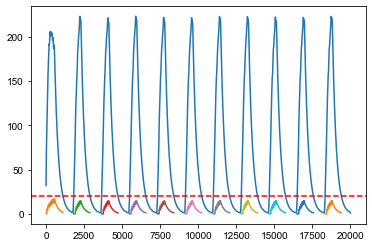

Episode durations


1074.2636363636366

In [3]:
# Import pandas for data saving
import pandas as pd
import numpy as np
from pylab import *
from Analysis_tools import *

#read data file
read_data = pd.read_csv("Single_coiling_Stim50_left_side_only.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

# function to smooth traces
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# function to return the start, end and duration of muscle output
def detect_event(VLMuscle, VRMuscle):
    
    X = np.sum(VLMuscle, axis=0) + np.sum(VRMuscle, axis=0)
    X = smooth(X, 500) #convolve with a step 50 ms wide
    Xt = Time[np.where(X > 20)]
    
    plt.plot(Time, X)
    plt.axhline(y=20, ls='--', c='r')

    end = Xt[[Xt[i+1] - Xt[i] > 0.2 for i in range(len(Xt)-1)]+[True]]
    start = Xt[[True]+[Xt[i+1] - Xt[i] > 0.2 for i in range(len(Xt)-1)]]
    duration = end - start
    
    return start, end, duration

from Analysis_tools import *
Threshold = 20
Start, End, Duration = detect_event(VLMuscle, VRMuscle, Time, Threshold) # calculate the start, end and duration of coils
print("Episode start and end times")
for s,e in zip(Start,End):
    print(s,e)
    plt.plot(Time[int(s*10):int(e*10)], VLMuscle[9,int(s*10):int(e*10)])
plt.show()
print("Episode durations")
Duration

Avg_duration = mean(Duration) # the average duration was calculated as the mean of the duration of all coiling events
Avg_duration

### Figure 2F-M - SENSITIVITY ANALYSIS

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import ticker



# Change default font to Arial
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"

SMALLER_SIZE = 5
SMALL_SIZE = 6

# GENERATE PANDAS DATAFRAME
# dataframe storing frequency of coils for each simulation run at different sigma values
#import .csv file with coiling frequency data for sigmaP, sigmaD or sigmaW
filepath = './%s.csv'
#sigmaP
#filename_freq = 'Fig2 sensitivity testing_sigmaP_frequency'
#filename_coils = 'Fig2 sensitivity testing_sigmaP_full coils'
#sigma = np.arange(0.0, 1.0, 0.1) #for t-tests later on
#x_label = "$\u03C3^P$" #for x axis label later on when plotting

##sigmaW
#filename_freq = 'Fig2 sensitivity testing_sigmaW_frequency'
#filename_coils = 'Fig2 sensitivity testing_sigmaW_full coils'
#sigma = np.arange(0.0, 1.1, 0.1) #for t-tests later on
#x_label = "$\u03C3^W$" #for x axis label later on when plotting

##sigmaD
#filename_freq = 'Fig2 sensitivity testing_sigmaD_frequency'
#filename_coils = 'Fig2 sensitivity testing_sigmaD_full coils'
#sigma = np.arange(0.0, 5.0, 0.5) #for t-tests later on
#x_label = "$\u03C3^D$" #for x axis label later on when plotting

#sigmaL
#filename_freq = 'sensitivity testing_coiling_sigmaL_frequency'
#filename_coils = 'sensitivity testing_coiling_sigmaL_full coils'
#sigma = np.arange(0.0, 1.1, 0.1) #for t-tests later on
#x_label = "$\u03C3^L$" #for x axis label later on when plotting

filenames_freq = ['single coiling_sensitivity testing_sigmaD_frequency','single coiling_sensitivity testing_sigmaL_frequency',
                  'single coiling_sensitivity testing_sigmaP_frequency','single coiling_sensitivity testing_sigmaW_frequency']

filenames_coils = ['single coiling_sensitivity testing_sigmaD_full coils', 'single coiling_sensitivity testing_sigmaL_full coils',
                  'single coiling_sensitivity testing_sigmaP_full coils', 'single coiling_sensitivity testing_sigmaW_full coils']

x_labels = ["$\u03C3^D$", "$\u03C3^L$", "$\u03C3^P$", "$\u03C3^W$"]

fig, ax = plt.subplots(nrows =2, ncols = 4, figsize = (7, 3), squeeze=False)

sigmas = ['Sigma D', 'Sigma L', 'Sigma P', 'Sigma W']

for i in range(0,4):
    filename_freq = filenames_freq[i]
    filename_coils = filenames_coils[i]
    x_label = x_labels[i]

    if sigmas[i] == 'Sigma D':
        sigma = np.arange(0.0, 6, 1) #for t-tests later on
    elif sigmas[i] == 'Sigma L':
        sigma = np.arange(0.0, 1.1, 0.2) #for t-tests later on
    elif sigmas[i] == 'Sigma P':
        sigma = np.arange(0.0, 1.1, 0.2) #for t-tests later on
    elif sigmas[i] == 'Sigma W':
        sigma = np.arange(0.0, 1.1, 0.2) #for t-tests later on


    print(sigmas[i])
    #frequency of coiling dataframe
    data_freq = pd.read_csv(filepath % filename_freq)
    df_freq = pd.DataFrame(data_freq, columns = ['sigma value', 'run0', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9'], dtype = float)
    #df_freq = df_freq_temp[::2]  # Excludes every 2nd row starting from 0
    print(df_freq)
    # ratio of full/total coils dataframe
    data_coils = pd.read_csv(filepath % filename_coils)
    df_coils = pd.DataFrame(data_coils, columns = ['sigma value', 'run0', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9'], dtype = float)
    #df_coils = df_coils_temp[::2]  # Excludes every 2nd row starting from 0
    print(df_coils)

    #df_freq = df_freq.iloc[::2]
    #df_coils = df_coils.iloc[::2]

    # remove "sigma value" column from datafram to get means, std, and perform stats on actual data points
    df_freq_stats = df_freq.drop(columns=["sigma value"]) 
    print(df_freq_stats)
    df_coils_stats = df_coils.drop(columns=["sigma value"]) 
    print(df_coils_stats)
    ### MEAN + STANDARD DEV ###
    #frequency
    all_freq = []
    freq_mean = []
    freq_std = []
    for j in range(len(df_freq_stats)):
        all_freq.append(df_freq_stats.loc[j,:])
        freq_mean.append(np.mean(df_freq_stats.loc[j,:]))
        freq_std.append(np.std(df_freq_stats.loc[j,:]))
    # full/total coils
    all_ratio = []
    ratio_mean = [] 
    ratio_std = [] 
    for j in range(len(df_coils_stats)):
        all_ratio.append(df_coils_stats.loc[j,:])
        ratio_mean.append(np.mean(df_coils_stats.loc[j,:]))
        ratio_std.append(np.std(df_coils_stats.loc[j,:]))
        
    
    ### ANOVA ###
    #uncomment depending wether analyzing sigmaP/D or sigmaW
    
#    freq_f, freq_p = stats.f_oneway(df_freq_stats.loc[0,:], df_freq_stats.loc[1,:], df_freq_stats.loc[2,:], df_freq_stats.loc[3,:], df_freq_stats.loc[4,:], df_freq_stats.loc[5,:], df_freq_stats.loc[6,:], df_freq_stats.loc[7,:], df_freq_stats.loc[8,:], df_freq_stats.loc[9,:], df_freq_stats.loc[9,:], df_freq_stats.loc[10,:])
    freq_f, freq_p = stats.f_oneway(*all_freq)
    print("Coiling Frequency : Fvalue = " + str(freq_f), "Pvalue = " + str(freq_p))
    
    #DegFreedom_freq = 0
    #for i,values in enumerate(all_freq):
    #    DegFreedom_freq = len(all_freq[i])
    #print("Degrees of freedom of Coiling frequency :" + str(DegFreedom_freq))
    #print("\n")
#    coils_f, coils_p = stats.f_oneway(df_coils_stats.loc[0,:], df_coils_stats.loc[1,:], df_coils_stats.loc[2,:], df_coils_stats.loc[3,:], df_coils_stats.loc[4,:], df_coils_stats.loc[5,:], df_coils_stats.loc[6,:], df_coils_stats.loc[7,:], df_coils_stats.loc[8,:], df_coils_stats.loc[9,:], df_coils_stats.loc[10,:])
    coils_f, coils_p = stats.f_oneway(*all_ratio)
    print("Percentage of Full Coils : Fvalue = " + str(coils_f), "Pvalue = " + str(coils_p))

    stats_freq_file = sigmas[i] + "_freq_t-tests_single_coiling.csv"
    stats_percent_coils_file = sigmas[i] + "_percent_coils_t-tests_single_coiling.csv"

    f_freq = open(stats_freq_file,"w")
    f_percent = open(stats_percent_coils_file,"w")

    freq_stats_df = pd.DataFrame(columns = ["p-value", "Weight1", "Weight2"])
    percent_stats_df = pd.DataFrame(columns = ["p-value", "Weight1", "Weight2"])

    ### T-TESTS ###
    #frequency
    for k in range(0,len(sigma)):
         for j in range(k+1, len(sigma)):
                t_stats, pvalue = stats.ttest_ind(df_freq_stats.loc[k,:], df_freq_stats.loc[j,:])
                if np.isnan(pvalue):
                    pvalue = 1
                temp_stats_results_df = pd.DataFrame([(pvalue, sigma[j], sigma[k])], columns =["p-value", "Weight1", "Weight2"]) 
                freq_stats_df = freq_stats_df.append(temp_stats_results_df)    
                print("Frequency t-test between weight " +str(sigma[k]) + " and weight " + str(sigma[j]) + ": " 
                   + str(stats.ttest_ind(df_freq_stats.loc[k,:], df_freq_stats.loc[j,:])))
    ##full/total coils
    for k in range(0,len(sigma)):
         for j in range(k+1, len(sigma)):
                t_stats, pvalue = stats.ttest_ind(df_coils_stats.loc[k,:], df_coils_stats.loc[j,:])
                if np.isnan(pvalue):
                    pvalue = 1
                temp_stats_results_df = pd.DataFrame([(pvalue, sigma[j], sigma[k])], columns =["p-value", "Weight1", "Weight2"]) 
                percent_stats_df = percent_stats_df.append(temp_stats_results_df)
                print("Percentage Full Coils t-test between weight " +str(sigma[k]) + " and weight " + str(sigma[j]) + ": " 
                   + str(stats.ttest_ind(df_coils_stats.loc[k,:], df_coils_stats.loc[j,:])))
    
    freq_stats_df.to_csv(f_freq, line_terminator='\n')
    percent_stats_df.to_csv(f_percent,  line_terminator='\n')
    
    WIDTH = 0.7
    COLOR = '0.5'
    LINEWIDTH = 1
    SMALL_SIZE = 6

    ### CREATING BEESWARM PLOT WITH SEABORN SWARMPLOT ###
    # need to use the melt function in pandas to allow us to plot all run values for each value of sigma
    #coiling frequency
    df_freq= df_freq.melt('sigma value', var_name = 'runs', value_name = 'Frequency of Coiling (Hz)')
    #full/total coils
    df_coils= df_coils.melt('sigma value', var_name = 'run', value_name = 'Percentage of Full Coils')
    
    ### set up plotting parameters ###
    marker_size = 3
    font_size = 10
    font_weight = 'bold'
    
    #frequency 
    #fig = plt.figure(constrained_layout=False, figsize=(7, 4))
    sns.boxplot(ax=ax[0,i], x="sigma value", y="Frequency of Coiling (Hz)", data=df_freq, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False)
    sns.swarmplot(ax = ax[0,i], x="sigma value", y = "Frequency of Coiling (Hz)", hue='runs', palette ='husl', size=marker_size, data=df_freq) 
    ax[0,i].set_xlabel(x_label, fontsize=font_size, fontweight=font_weight)
    if i == 0:
        ax[0,i].set_ylabel("Coiling frequency (Hz)", fontsize=font_size-2, fontweight=font_weight) #y-axis title
    else:
        ax[0,i].set_ylabel('')
    ax[0,i].tick_params(axis='both', which='both', length=0) # set tick parameters
    ax[0,i].set_ylim([0.5,1]) # set y-axis limits
    for item in ([ax[0,i].title, ax[0,i].yaxis.label] +
         ax[0,i].get_xticklabels() + ax[0,i].get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    ax[0,i].legend_.remove() # remove the legend
    ax[0,i].xaxis.labelpad = 15
    ax[0,i].set_xticks([]) # remove x-axis ticks
    
    #full/total coils
    sns.boxplot(ax=ax[1,i], x="sigma value", y="Percentage of Full Coils", data=df_coils, width = WIDTH, linewidth = LINEWIDTH, color=COLOR, showfliers = False)
    sns.swarmplot(ax = ax[1,i],x="sigma value", y = "Percentage of Full Coils", hue='run', palette='husl', size=marker_size, data=df_coils) #dodge=True
    ax[1,i].set_xlabel(x_label, fontsize=font_size, fontweight=font_weight)
    if i == 0:
        ax[1,i].set_ylabel("% Full Coils", fontsize=font_size-2, fontweight=font_weight) #y-axis title
    else:
        ax[1,i].set_ylabel('')

    ax[1,i].tick_params(axis='both', which='both', length=0) # set tick parameters
    ax[1,i].set_ylim([0,1.1]) # set y-axis limits
    for item in ([ax[1,i].title, ax[1,i].yaxis.label] +
         ax[1,i].get_xticklabels() + ax[1,i].get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    ax[1,i].legend_.remove() # remove the legend
    ax[1,i].xaxis.labelpad = 15
    ax[1,i].set_xticks([]) # remove x-axis ticks

    
plt.tight_layout()    
plt.savefig("Single_coiling_sensitivity_analysis.png", dpi=1000)
plt.show()



## Figure 2 - figure supplement 1A - IC null simulation

In [ ]:

from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### FIGURE SETUP ###

# Declare figure and subplots
fig = plt.figure(constrained_layout=False, figsize=(7, 2.5))

widths = [1]
heights = [1,1,1]
gs = fig.add_gridspec(nrows=3, ncols=1, width_ratios=widths, height_ratios=heights)

#Declare color maps to be used
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

# Declare line lengths and line widths
LINELENGTH = 0.5
LINEWIDTH = 0.75
plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

#Declare font size
SMALLER_SIZE = 5
SMALL_SIZE = 6
FONT_STYLE = 'bold'

# x range for coiling simulation
xstart = 0
xend = 15000

### Read data file
read_data = pd.read_csv("Single_coiling_IC_KO.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

#Declare MN, ICs and V0ds to be plotted
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [0,2,4] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

# Declare y-axis min and max
lower_y = -70
upper_y = 20

#Declare MN, IC and V0d subplots
fig_MN_activity = fig.add_subplot(gs[0, 0])
fig_IC_activity = fig.add_subplot(gs[1, 0])
fig_V0d_activity = fig.add_subplot(gs[2, 0])

# plotting motoneuron traces
for k in list_MNs:
    lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_MN_activity.plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
leg=fig_MN_activity.legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

# Set-up MN plot
fig_MN_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_activity.set_ylim([lower_y, upper_y]) #y-axis limits
#Declare borders to display
fig_MN_activity.spines['top'].set_visible(False)
fig_MN_activity.spines['right'].set_visible(False)
fig_MN_activity.spines['bottom'].set_visible(False)
fig_MN_activity.spines['left'].set_visible(False)
#Declare tick parameters
fig_MN_activity.tick_params(axis='both', which='both', length=0)
fig_MN_activity.set_xticks([i*5000 for i in range(0,0)])
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
         fig_MN_activity.get_xticklabels() + fig_MN_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_activity.set_xlim([xstart, xend]) #x-axis limit
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)]) # y-axis ticks

# plotting IC traces. Same set-up as MN traces
for k in list_ICs:
    lines_left, = fig_IC_activity.plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_IC_activity.plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=fig_IC_activity.legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_IC_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_IC_activity.set_ylim([lower_y, upper_y])
fig_IC_activity.spines['top'].set_visible(False)
fig_IC_activity.spines['right'].set_visible(False)
fig_IC_activity.spines['bottom'].set_visible(False)
fig_IC_activity.spines['left'].set_visible(False)
fig_IC_activity.tick_params(axis='both', which='both', length=0)
fig_IC_activity.set_xticks([i*5000 for i in range(0,0)])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_IC_activity.title, fig_IC_activity.xaxis.label, fig_IC_activity.yaxis.label] +
         fig_IC_activity.get_xticklabels() + fig_IC_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_IC_activity.set_xlim([xstart, xend])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting V0d traces. Same set-up as MN traces
for k in list_V0ds:
    lines_left, = fig_V0d_activity.plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0d_activity.plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
leg=fig_V0d_activity.legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0d_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0d_activity.set_ylim([lower_y, upper_y])
fig_V0d_activity.spines['top'].set_visible(False)
fig_V0d_activity.spines['right'].set_visible(False)
fig_V0d_activity.spines['bottom'].set_visible(False)
fig_V0d_activity.spines['left'].set_visible(False)
fig_V0d_activity.tick_params(axis='both', which='both', length=0)
for item in ([fig_V0d_activity.title, fig_V0d_activity.xaxis.label, fig_V0d_activity.yaxis.label] +
         fig_V0d_activity.get_xticklabels() + fig_V0d_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0d_activity.set_yticks([i*50 + -50 for i in range(0,2)])
fig_V0d_activity.set_xticks([i*5000 for i in range(0,5)])
fig_V0d_activity.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
fig_V0d_activity.set_xlim([xstart, xend])

#insert blue background from t=5000 to 10000
fig_IC_activity.axvspan(5000, 10000, facecolor='xkcd:light blue', alpha=0.5)
fig_MN_activity.axvspan(5000, 10000, facecolor='xkcd:light blue', alpha=0.5)
fig_V0d_activity.axvspan(5000, 10000, facecolor='xkcd:light blue', alpha=0.5)

plt.savefig("Single_coiling_IC_KO.png", dpi=1000)
plt.show()

## Figure 2 - figure supplement 1B - MN null simulation

In [ ]:

from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### FIGURE SETUP ###

#Declare figure and subplots
fig = plt.figure(constrained_layout=False, figsize=(7, 2.5))

widths = [1]
heights = [1,1,1]
gs = fig.add_gridspec(nrows=3, ncols=1, width_ratios=widths, height_ratios=heights)

#Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

#Declare line lengths and widths
LINELENGTH = 0.5
LINEWIDTH = 0.75

plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

SMALLER_SIZE = 5
SMALL_SIZE = 6
FONT_STYLE = 'bold'

# x range for coiling simulation
xstart = 0
xend = 15000

# Read data file
read_data = pd.read_csv("Single_coiling_MN_KO.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END


# Declare MNs, ICs and V0ds to plot
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [0,2,4] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

# y-axis limts
lower_y = -70
upper_y = 20

#declare MN, IC, and V0d subplots
fig_MN_activity = fig.add_subplot(gs[0, 0])
fig_IC_activity = fig.add_subplot(gs[1, 0])
fig_V0d_activity = fig.add_subplot(gs[2, 0])

# plotting motoneuron traces
for k in list_MNs:
    lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_MN_activity.plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
# set-up legend
leg=fig_MN_activity.legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

#set up MN graph
fig_MN_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_activity.set_ylim([lower_y, upper_y]) #y-axis limit
#set up borders to display
fig_MN_activity.spines['top'].set_visible(False)
fig_MN_activity.spines['right'].set_visible(False)
fig_MN_activity.spines['bottom'].set_visible(False)
fig_MN_activity.spines['left'].set_visible(False)
#set up ticks
fig_MN_activity.tick_params(axis='both', which='both', length=0)
fig_MN_activity.set_xticks([i*5000 for i in range(0,0)])
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
         fig_MN_activity.get_xticklabels() + fig_MN_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_activity.set_xlim([xstart, xend]) #x-axis limits
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)]) #y-axis ticks

# plotting IC traces.  Same set-up as MN graph
for k in list_ICs:
    lines_left, = fig_IC_activity.plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_IC_activity.plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=fig_IC_activity.legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_IC_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_IC_activity.set_ylim([lower_y, upper_y])
fig_IC_activity.spines['top'].set_visible(False)
fig_IC_activity.spines['right'].set_visible(False)
fig_IC_activity.spines['bottom'].set_visible(False)
fig_IC_activity.spines['left'].set_visible(False)
fig_IC_activity.tick_params(axis='both', which='both', length=0)
fig_IC_activity.set_xticks([i*5000 for i in range(0,0)])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_IC_activity.title, fig_IC_activity.xaxis.label, fig_IC_activity.yaxis.label] +
         fig_IC_activity.get_xticklabels() + fig_IC_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_IC_activity.set_xlim([xstart, xend])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting V0d traces.  Same set-up as MN graph
for k in list_V0ds:
    lines_left, = fig_V0d_activity.plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0d_activity.plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
leg=fig_V0d_activity.legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0d_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0d_activity.set_ylim([lower_y, upper_y])
fig_V0d_activity.spines['top'].set_visible(False)
fig_V0d_activity.spines['right'].set_visible(False)
fig_V0d_activity.spines['bottom'].set_visible(False)
fig_V0d_activity.spines['left'].set_visible(False)
fig_V0d_activity.tick_params(axis='both', which='both', length=0)
for item in ([fig_V0d_activity.title, fig_V0d_activity.xaxis.label, fig_V0d_activity.yaxis.label] +
         fig_V0d_activity.get_xticklabels() + fig_V0d_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0d_activity.set_yticks([i*50 + -50 for i in range(0,2)])
fig_V0d_activity.set_xticks([i*5000 for i in range(0,5)])
fig_V0d_activity.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
fig_V0d_activity.set_xlim([xstart, xend])

#insert blue background from t=5000 to 10000
fig_IC_activity.axvspan(5000, 10000, facecolor='xkcd:light blue', alpha=0.5)
fig_MN_activity.axvspan(5000, 10000, facecolor='xkcd:light blue', alpha=0.5)
fig_V0d_activity.axvspan(5000, 10000, facecolor='xkcd:light blue', alpha=0.5)

plt.savefig("Single_coiling_MN_KO.png", dpi=1000)
plt.show()

## Figure 2 - figure supplement 1C - V0d null simulation

In [ ]:

from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### FIGURE SETUP ###

#Declare figure and subplots
fig = plt.figure(constrained_layout=False, figsize=(7, 2.5))

widths = [1]
heights = [1,1,1]
gs = fig.add_gridspec(nrows=3, ncols=1, width_ratios=widths, height_ratios=heights)

#Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

#Declare line lengths and widths
LINELENGTH = 0.5
LINEWIDTH = 0.75

plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

SMALLER_SIZE = 5
SMALL_SIZE = 6
FONT_STYLE = 'bold'

# x range for coiling simulation
xstart = 0
xend = 15000

read_data = pd.read_csv("Single_coiling_V0d_KO.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

# Declare MN, IC and V0d to be plotted
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [0,2,4] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

# y-axis limit
lower_y = -70
upper_y = 20

#declare MN, IC and V0d subplots
fig_MN_activity = fig.add_subplot(gs[0, 0])
fig_IC_activity = fig.add_subplot(gs[1, 0])
fig_V0d_activity = fig.add_subplot(gs[2, 0])

# plotting motoneuron traces
for k in list_MNs:
    lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_MN_activity.plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
# set-up legend
leg=fig_MN_activity.legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

#Set up MN plot
fig_MN_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
fig_MN_activity.set_ylim([lower_y, upper_y]) #y-axis limit
#Set up borders to display
fig_MN_activity.spines['top'].set_visible(False)
fig_MN_activity.spines['right'].set_visible(False)
fig_MN_activity.spines['bottom'].set_visible(False)
fig_MN_activity.spines['left'].set_visible(False)
#set-up ticks
fig_MN_activity.tick_params(axis='both', which='both', length=0)
fig_MN_activity.set_xticks([i*5000 for i in range(0,0)])
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
         fig_MN_activity.get_xticklabels() + fig_MN_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_activity.set_xlim([xstart, xend]) #x-axis limit
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting IC traces. Same set-up as MN plot
for k in list_ICs:
    lines_left, = fig_IC_activity.plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_IC_activity.plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=fig_IC_activity.legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_IC_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_IC_activity.set_ylim([lower_y, upper_y])
fig_IC_activity.spines['top'].set_visible(False)
fig_IC_activity.spines['right'].set_visible(False)
fig_IC_activity.spines['bottom'].set_visible(False)
fig_IC_activity.spines['left'].set_visible(False)
fig_IC_activity.tick_params(axis='both', which='both', length=0)
fig_IC_activity.set_xticks([i*5000 for i in range(0,0)])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_IC_activity.title, fig_IC_activity.xaxis.label, fig_IC_activity.yaxis.label] +
         fig_IC_activity.get_xticklabels() + fig_IC_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_IC_activity.set_xlim([xstart, xend])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting V0d traces. Same set-up as MN plot
for k in list_V0ds:
    lines_left, = fig_V0d_activity.plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0d_activity.plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
leg=fig_V0d_activity.legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0d_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0d_activity.set_ylim([lower_y, upper_y])
fig_V0d_activity.spines['top'].set_visible(False)
fig_V0d_activity.spines['right'].set_visible(False)
fig_V0d_activity.spines['bottom'].set_visible(False)
fig_V0d_activity.spines['left'].set_visible(False)
fig_V0d_activity.tick_params(axis='both', which='both', length=0)
for item in ([fig_V0d_activity.title, fig_V0d_activity.xaxis.label, fig_V0d_activity.yaxis.label] +
         fig_V0d_activity.get_xticklabels() + fig_V0d_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0d_activity.set_yticks([i*50 + -50 for i in range(0,2)])
fig_V0d_activity.set_xticks([i*5000 for i in range(0,5)])
fig_V0d_activity.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
fig_V0d_activity.set_xlim([xstart, xend])

# insert blue backgrounds from t = 5000 to 10000
fig_IC_activity.axvspan(5000, 10000, facecolor='xkcd:light blue', alpha=0.5)
fig_MN_activity.axvspan(5000, 10000, facecolor='xkcd:light blue', alpha=0.5)
fig_V0d_activity.axvspan(5000, 10000, facecolor='xkcd:light blue', alpha=0.5)

plt.savefig("Single_coiling_V0d_KO.png", dpi=1000)
plt.show()

## Figure 2 - figure supplement 2 - 30 somite coiling model

In [ ]:

from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np

### FIGURE SETUP ###
#Declare figure and subplots
fig = plt.figure(constrained_layout=False, figsize=(5.5, 3.6))

widths = [1]
heights = [1,1,1]
gs = fig.add_gridspec(nrows=3, ncols=1, width_ratios=widths, height_ratios=heights)

# Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')

#declare line lengths and widths
LINELENGTH = 0.5
LINEWIDTH = 0.75

plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

# declare font sizes
SMALLER_SIZE = 5
SMALL_SIZE = 6
FONT_STYLE = 'bold'

# x range for coiling simulation
xstart = 5000
xend = 15000

#Read data file
read_data = pd.read_csv("Single_coiling_30_somites.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

##nMN = len(VLMN[:,0])
##nIC = len(VLIC[:,0])
##nV0d = len(VLV0d[:,0])
##nMuscle = len(VLMuscle[:,0])

#Declare MN, IC and V0d traces to be plotted
list_MNs = [int(nMN*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_ICs = [0,2,4] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis
list_V0ds = [int(nV0d*i/4) for i in range(1,4)] #Plot 25th, 50th, and 75th neuron on rostrocaudal axis

#y-axis limits
lower_y = -70
upper_y = 20

# declare MN, IC, and V0d subplots
fig_MN_activity = fig.add_subplot(gs[0, 0])
fig_IC_activity = fig.add_subplot(gs[1, 0])
fig_V0d_activity = fig.add_subplot(gs[2, 0])

# plotting MN traces
for k in list_MNs:
    lines_left, = fig_MN_activity.plot(Time, VLMN[k,:], c=cmapRed((k+1)/nMN),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_MN_activity.plot(Time, VRMN[k,:], c=cmapGrey((k+1)/nMN/2), linestyle='-')
# legend set-up
leg=fig_MN_activity.legend(handles=[lines_left, lines_right], labels=['L MNs','R MNs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_MN_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) # y-axis title
fig_MN_activity.set_ylim([lower_y, upper_y]) #y-axis limit
# Remove borders
fig_MN_activity.spines['top'].set_visible(False)
fig_MN_activity.spines['right'].set_visible(False)
fig_MN_activity.spines['bottom'].set_visible(False)
fig_MN_activity.spines['left'].set_visible(False)
# set up ticks
fig_MN_activity.tick_params(axis='both', which='both', length=0)
fig_MN_activity.set_xticks([i*5000 for i in range(0,0)])
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_MN_activity.title, fig_MN_activity.xaxis.label, fig_MN_activity.yaxis.label] +
         fig_MN_activity.get_xticklabels() + fig_MN_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_MN_activity.set_xlim([xstart, xend]) # x-axis limits
fig_MN_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting IC traces. Same set-up as MN plot
for k in list_ICs:
    lines_left, = fig_IC_activity.plot(Time, VLIC[k,:], c=cmapBrown((k+1)/nIC),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_IC_activity.plot(Time, VRIC[k,:], c=cmapGrey((k+1)/nIC/2), linestyle='-')
leg=fig_IC_activity.legend(handles=[lines_left, lines_right], labels=['L ICs','R ICs'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('brown')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_IC_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_IC_activity.set_ylim([lower_y, upper_y])
fig_IC_activity.spines['top'].set_visible(False)
fig_IC_activity.spines['right'].set_visible(False)
fig_IC_activity.spines['bottom'].set_visible(False)
fig_IC_activity.spines['left'].set_visible(False)
fig_IC_activity.tick_params(axis='both', which='both', length=0)
fig_IC_activity.set_xticks([i*5000 for i in range(0,0)])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])
for item in ([fig_IC_activity.title, fig_IC_activity.xaxis.label, fig_IC_activity.yaxis.label] +
         fig_IC_activity.get_xticklabels() + fig_IC_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_IC_activity.set_xlim([xstart, xend])
fig_IC_activity.set_yticks([i*50 + -50 for i in range(0,2)])

# plotting V0d traces. Same set-up as MN plot
for k in list_V0ds:
    lines_left, = fig_V0d_activity.plot(Time, VLV0d[k,:], c=cmapGreen((k+1)/nV0d),linestyle='-') # adding a color gradient, lighter color -> rostrally located
    lines_right, = fig_V0d_activity.plot(Time, VRV0d[k,:], c=cmapGrey((k+1)/nV0d/2), linestyle='-')
leg=fig_V0d_activity.legend(handles=[lines_left, lines_right], labels=['L V0ds','R V0ds'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('grey')
for line in leg.get_lines():
    line.set_linewidth(LINEWIDTH)

fig_V0d_activity.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
fig_V0d_activity.set_ylim([lower_y, upper_y])
fig_V0d_activity.spines['top'].set_visible(False)
fig_V0d_activity.spines['right'].set_visible(False)
fig_V0d_activity.spines['bottom'].set_visible(False)
fig_V0d_activity.spines['left'].set_visible(False)
fig_V0d_activity.tick_params(axis='both', which='both', length=0)
for item in ([fig_V0d_activity.title, fig_V0d_activity.xaxis.label, fig_V0d_activity.yaxis.label] +
         fig_V0d_activity.get_xticklabels() + fig_V0d_activity.get_yticklabels()):
    item.set_fontsize(SMALL_SIZE)
fig_V0d_activity.set_yticks([i*50 + -50 for i in range(0,2)])
fig_V0d_activity.set_xticks([i*5000 for i in range(0,5)])
fig_V0d_activity.set_xlabel('Time (ms)', fontsize= SMALL_SIZE, fontweight='bold')
fig_V0d_activity.set_xlim([xstart, xend])

plt.savefig("Single_coiling_30_somites.png", dpi=1000)
plt.show()

# Supplementary Videos

## Multi-panel animation - Video 1 - Base model

In [ ]:

%matplotlib notebook
%matplotlib notebook
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

#Declare standard line lengths and widths
LINELENGTH = 0.5
LINEWIDTH = 1
plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

#font sizes
SMALLER_SIZE = 12
SMALL_SIZE = 12

FONT_STYLE = 'bold'

# y-axis limits
lower_y = -70
upper_y = 20

# Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')
cmapYellow = matplotlib.cm.get_cmap('YlOrBr')

#insert image file of single coiling model
img = mpimg.imread('Single_coiling_long.png')

# function to animate simulation
def multipanel_anim(Time,nMuscle,nmax, VRIC, VLIC, VRMN, VLMN, VRV0d, VLV0d, VRMuscle,VLMuscle,dt):

    #Declare figure and subplots
    fig = plt.figure(figsize=(15, 6))
    
    fig_diagram = fig.add_subplot(1,3,1)   # [left, bottom, width, height]
    fig_angles = fig.add_subplot(1,3,3)   #  Figure for body kinematics  
    fig_IC = fig.add_subplot(3,3,2)    #Figure for IC firing
    fig_MN = fig.add_subplot(3,3,5)    #  Figure for MN firing
    fig_V0d = fig.add_subplot(3,3,8)    # Figure for V0d firing
        
    # insert image file of single coiling model
    fig_diagram.imshow(img)
    fig_diagram.axis('off')
    
    # associate traces with subplots
    LIC_firing, = fig_IC.plot([], [], lw=1, color = cmapBrown(0.9))
    RIC_firing, = fig_IC.plot([], [], lw=1, color = 'Grey')

    LMN_firing, = fig_MN.plot([], [], lw=1, color = cmapRed(0.6))
    RMN_firing, = fig_MN.plot([], [], lw=1, color = 'Grey')
 
    LV0d_firing, = fig_V0d.plot([], [], lw=1, color = cmapGreen(0.6))
    RV0d_firing, = fig_V0d.plot([], [], lw=1, color = 'Grey')
       
    Muscle_angles, = fig_angles.plot([], [], 'o-', lw=3, color = 'Black')
    Muscle_angles_highlight, = fig_angles.plot([], [], 'o-', lw=3, color = 'Red')
    
    # Allocating arrays for velocity and position
    vel = np.zeros((nMuscle, nmax))
    pos = np.zeros((nMuscle, nmax))
    
    # Setting constants and initial values for vel. and pos.
    khi = 3.0  #damping cste , high khi =0.5/ low = 0.1
    w0 = 2.5 #2.5  #20Hz = 125.6
    vel0 = 0.0
    pos0 = 0.0
    Wd = w0
    
    for k in range (0,nMuscle):
        vel[k,0] = vel0    #Sets the initial velocity
        pos[k,0] = pos0    #Sets the initial position
        pos[nMuscle-1,0] = 0.0
        for i in range(1,nmax):
        
            vel[k,i] = -(w0**2)*pos[k,i-1]*dt + vel[k,i-1]*(1-(2*dt*khi*w0)) + 0.1*VRMuscle[k,i-1]*dt - 0.1*VLMuscle[k,i-1]*dt
            pos[k,i] = dt*vel[k,i-1] + pos[k,i-1]
    
    ### DYNAMIC PLOTING
    
    x = np.zeros((nMuscle,nmax))
    y = np.zeros((nMuscle,nmax))
    
    for i in range (0,nmax):
        x[0,i] = 0
        y[0,i] = 0
        pos[0,i] = 0
        for k in range (1,nMuscle):
            pos[k,i] = pos[k-1,i] + pos[k,i]
            
            x[k,i] = x[k-1,i] + np.sin(pos[k,i])
            y[k,i] = y[k-1,i] - np.cos(pos[k,i])
    
    fig_angles.grid()
    fig_angles.set_ylim(-15, 5)
    fig_angles.set_xlim(-10, 10)
    fig_IC.set_ylim(-80, 20)
    fig_IC.set_xlim(0, nmax*dt)
    fig_MN.set_ylim(-80, 20)
    fig_MN.set_xlim(0, nmax*dt)
    fig_V0d.set_ylim(-80, 20)
    fig_V0d.set_xlim(0, nmax*dt)

    # set up text to update time
    time_template = 'time = %.1fms'
    time_text = fig_angles.text(0.05, 0.1, '', transform=fig_angles.transAxes)
    fig_angles.legend()
    fig_angles.set_ylabel('Model somite index')
    fig_angles.set_ylim([-19, 4])
    fig_angles.set_xticks([])

    # Set-up IC firing plot
    leg=fig_IC.legend(handles=[LIC_firing, RIC_firing], labels=['L IC','R IC'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBrown(0.9))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_IC.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
    fig_IC.set_ylim([lower_y, upper_y]) # y-axis limit
    # remove borders
    fig_IC.spines['top'].set_visible(False)
    fig_IC.spines['right'].set_visible(False)
    fig_IC.spines['bottom'].set_visible(False)
    fig_IC.spines['left'].set_visible(False)
    # set up ticks
    fig_IC.tick_params(axis='both', which='both', length=0)
    for item in ([fig_IC.title, fig_IC.xaxis.label, fig_IC.yaxis.label] +
             fig_IC.get_xticklabels() + fig_IC.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_IC.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_IC.set_xticks([i*5000 for i in range(0,5)])
    fig_IC.set_xlim([Time[0], Time[-1]])
    
    # Set-up MN firing plot. Same set-up as IC firing plot
    leg=fig_MN.legend(handles=[LMN_firing, RMN_firing], labels=['L MN','R MN'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRed(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_MN.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_MN.set_ylim([lower_y, upper_y])
    fig_MN.spines['top'].set_visible(False)
    fig_MN.spines['right'].set_visible(False)
    fig_MN.spines['bottom'].set_visible(False)
    fig_MN.spines['left'].set_visible(False)
    fig_MN.tick_params(axis='both', which='both', length=0)
    for item in ([fig_MN.title, fig_MN.xaxis.label, fig_MN.yaxis.label] +
             fig_MN.get_xticklabels() + fig_MN.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_MN.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_MN.set_xticks([i*5000 for i in range(0,5)])
    fig_MN.set_xlim([Time[0], Time[-1]])
        
    # Set-up V0d firing plot. Same set-up as IC firing plot
    leg=fig_V0d.legend(handles=[LV0d_firing, RV0d_firing], labels=['L V0d','R V0d'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapGreen(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0d.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V0d.set_ylim([lower_y, upper_y])
    fig_V0d.spines['top'].set_visible(False)
    fig_V0d.spines['right'].set_visible(False)
    fig_V0d.spines['bottom'].set_visible(False)
    fig_V0d.spines['left'].set_visible(False)
    fig_V0d.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V0d.title, fig_V0d.xaxis.label, fig_V0d.yaxis.label] +
             fig_V0d.get_xticklabels() + fig_V0d.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0d.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0d.set_xticks([i*5000 for i in range(0,5)])
    fig_V0d.set_xlim([Time[0], Time[-1]])
    
    # Function to initiate the animation plot
    def init():
        Muscle_angles.set_data([], [])
        LIC_firing.set_data([], [])
        RIC_firing.set_data([], [])
        LMN_firing.set_data([], [])
        RMN_firing.set_data([], [])
        LV0d_firing.set_data([], [])
        RV0d_firing.set_data([], [])
        time_text.set_text('')
        return Muscle_angles, LIC_firing, RIC_firing, LMN_firing, RMN_firing, LV0d_firing, RV0d_firing, time_text
    
    # Function that will animate every single time point
    def animate(i):
        
        thisx = [x[k,i] for k in range(nMuscle)]
        thisy = [y[k,i] for k in range(nMuscle)]
        
        Muscle_angles.set_data(thisx, thisy)
        Muscle_angles_highlight.set_data(x[3,i], y[3,i])
        
        time_text.set_text(time_template % (Time[i]))

        LIC_firing.set_data(Time[0:i], VLIC[2, 0:i])
        RIC_firing.set_data(Time[0:i], VRIC[2, 0:i])

        LMN_firing.set_data(Time[0:i], VLMN[3, 0:i])
        RMN_firing.set_data(Time[0:i], VRMN[3, 0:i])
        
        LV0d_firing.set_data(Time[0:i], VLV0d[3, 0:i])
        RV0d_firing.set_data(Time[0:i], VRV0d[3, 0:i])

        return Muscle_angles, LIC_firing, RIC_firing, LMN_firing, RMN_firing, LV0d_firing, RV0d_firing,  time_text
    
    #the call below drives the animation
    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), #animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), for faster animation
                                  interval=10, blit=False, init_func=init)
        
    plt.tight_layout()
    plt.show()
    return ani


### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###

# read data file
read_data = pd.read_csv("Single_coiling_Stim50_left_side_only.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

mywriter = animation.FFMpegWriter()
nMuscle = 10
dt = 0.1

tstart = 5000 # time point in simulation to start the animation 
tend = 6500 # time point in simulation to end the animation
start = int(tstart/dt)
end = int(tend/dt)
nmax = int((tend-tstart)/dt)
ani = multipanel_anim(Time[start:end],nMuscle,nmax, VRIC[:,start:end], VLIC[:,start:end], VRMN[:,start:end], VLMN[:,start:end], 
                      VRV0d[:,start:end], VLV0d[:,start:end], VRMuscle[:,start:end],VLMuscle[:,start:end],dt)


In [ ]:
ani.save("Figure 2 - video 1.mp4")#, fps=30)#, extra_args=['-vcodec', 'libx264'])

## Multi-panel animation - Video 2 - Truncated coils

In [ ]:

%matplotlib notebook
%matplotlib notebook
from Izhikevich_class import*
from Analysis_tools import *
import pandas as pd
import numpy as np
import matplotlib.image as mpimg

#Declare standard line lengths and widths
LINELENGTH = 0.5
LINEWIDTH = 1
plt.rc('lines', linewidth=LINEWIDTH) 

# Change default font to Arial
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Arial:italic:bold'

#font sizes
SMALLER_SIZE = 12
SMALL_SIZE = 12

FONT_STYLE = 'bold'

# y-axis limits
lower_y = -70
upper_y = 20

# Declare color maps
cmapGrey = matplotlib.cm.get_cmap('Greys')
cmapBlue = matplotlib.cm.get_cmap('Blues')
cmapRed = matplotlib.cm.get_cmap('Reds')
cmapGreen = matplotlib.cm.get_cmap('Greens')
cmapBrown = matplotlib.cm.get_cmap('YlOrBr')
cmapRedPurple = matplotlib.cm.get_cmap('RdPu')
cmapBrightGreen = matplotlib.cm.get_cmap('hsv')
cmapYellow = matplotlib.cm.get_cmap('YlOrBr')

#insert image file of single coiling model
img = mpimg.imread('Single_coiling_long.png')

# function to animate simulation
def multipanel_anim(Time,nMuscle,nmax, VRIC, VLIC, VRMN, VLMN, VRV0d, VLV0d, VRMuscle,VLMuscle,dt):

    #Declare figure and subplots
    fig = plt.figure(figsize=(15, 6))
    
    fig_diagram = fig.add_subplot(1,3,1)   # [left, bottom, width, height]
    fig_angles = fig.add_subplot(1,3,3)   #  Figure for body kinematics  
    fig_IC = fig.add_subplot(3,3,2)    #Figure for IC firing
    fig_MN = fig.add_subplot(3,3,5)    #  Figure for MN firing
    fig_V0d = fig.add_subplot(3,3,8)    # Figure for V0d firing
        
    # insert image file of single coiling model
    fig_diagram.imshow(img)
    fig_diagram.axis('off')
    
    # associate traces with subplots
    LIC_firing, = fig_IC.plot([], [], lw=1, color = cmapBrown(0.9))
    RIC_firing, = fig_IC.plot([], [], lw=1, color = 'Grey')

    LMN_firing, = fig_MN.plot([], [], lw=1, color = cmapRed(0.6))
    RMN_firing, = fig_MN.plot([], [], lw=1, color = 'Grey')
 
    LV0d_firing, = fig_V0d.plot([], [], lw=1, color = cmapGreen(0.6))
    RV0d_firing, = fig_V0d.plot([], [], lw=1, color = 'Grey')
       
    Muscle_angles, = fig_angles.plot([], [], 'o-', lw=3, color = 'Black')
    Muscle_angles_highlight, = fig_angles.plot([], [], 'o-', lw=3, color = 'Red')
    
    # Allocating arrays for velocity and position
    vel = np.zeros((nMuscle, nmax))
    pos = np.zeros((nMuscle, nmax))
    
    # Setting constants and initial values for vel. and pos.
    khi = 3.0  #damping cste , high khi =0.5/ low = 0.1
    w0 = 2.5 #2.5  #20Hz = 125.6
    vel0 = 0.0
    pos0 = 0.0
    Wd = w0
    
    for k in range (0,nMuscle):
        vel[k,0] = vel0    #Sets the initial velocity
        pos[k,0] = pos0    #Sets the initial position
        pos[nMuscle-1,0] = 0.0
        for i in range(1,nmax):
        
            vel[k,i] = -(w0**2)*pos[k,i-1]*dt + vel[k,i-1]*(1-(2*dt*khi*w0)) + 0.1*VRMuscle[k,i-1]*dt - 0.1*VLMuscle[k,i-1]*dt
            pos[k,i] = dt*vel[k,i-1] + pos[k,i-1]
    
    ### DYNAMIC PLOTING
    
    x = np.zeros((nMuscle,nmax))
    y = np.zeros((nMuscle,nmax))
    
    for i in range (0,nmax):
        x[0,i] = 0
        y[0,i] = 0
        pos[0,i] = 0
        for k in range (1,nMuscle):
            pos[k,i] = pos[k-1,i] + pos[k,i]
            
            x[k,i] = x[k-1,i] + np.sin(pos[k,i])
            y[k,i] = y[k-1,i] - np.cos(pos[k,i])
    
    fig_angles.grid()
    fig_angles.set_ylim(-15, 5)
    fig_angles.set_xlim(-10, 10)
    fig_IC.set_ylim(-80, 20)
    fig_IC.set_xlim(0, nmax*dt)
    fig_MN.set_ylim(-80, 20)
    fig_MN.set_xlim(0, nmax*dt)
    fig_V0d.set_ylim(-80, 20)
    fig_V0d.set_xlim(0, nmax*dt)

    # set up text to update time
    time_template = 'time = %.1fms'
    time_text = fig_angles.text(0.05, 0.1, '', transform=fig_angles.transAxes)
    fig_angles.legend()
    fig_angles.set_ylabel('Model somite index')
    fig_angles.set_ylim([-19, 4])
    fig_angles.set_xticks([])

    # Set-up IC firing plot
    leg=fig_IC.legend(handles=[LIC_firing, RIC_firing], labels=['L IC','R IC'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapBrown(0.9))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_IC.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE) #y-axis title
    fig_IC.set_ylim([lower_y, upper_y]) # y-axis limit
    # remove borders
    fig_IC.spines['top'].set_visible(False)
    fig_IC.spines['right'].set_visible(False)
    fig_IC.spines['bottom'].set_visible(False)
    fig_IC.spines['left'].set_visible(False)
    # set up ticks
    fig_IC.tick_params(axis='both', which='both', length=0)
    for item in ([fig_IC.title, fig_IC.xaxis.label, fig_IC.yaxis.label] +
             fig_IC.get_xticklabels() + fig_IC.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_IC.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_IC.set_xticks([i*5000 for i in range(0,5)])
    fig_IC.set_xlim([Time[0], Time[-1]])
    
    # Set-up MN firing plot. Same set-up as IC firing plot
    leg=fig_MN.legend(handles=[LMN_firing, RMN_firing], labels=['L MN','R MN'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapRed(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_MN.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_MN.set_ylim([lower_y, upper_y])
    fig_MN.spines['top'].set_visible(False)
    fig_MN.spines['right'].set_visible(False)
    fig_MN.spines['bottom'].set_visible(False)
    fig_MN.spines['left'].set_visible(False)
    fig_MN.tick_params(axis='both', which='both', length=0)
    for item in ([fig_MN.title, fig_MN.xaxis.label, fig_MN.yaxis.label] +
             fig_MN.get_xticklabels() + fig_MN.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_MN.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_MN.set_xticks([i*5000 for i in range(0,5)])
    fig_MN.set_xlim([Time[0], Time[-1]])
        
    # Set-up V0d firing plot. Same set-up as IC firing plot
    leg=fig_V0d.legend(handles=[LV0d_firing, RV0d_firing], labels=['L V0d','R V0d'], loc='upper right', handlelength=LINELENGTH, fontsize=SMALLER_SIZE)
    leg.legendHandles[0].set_color(cmapGreen(0.6))
    leg.legendHandles[1].set_color('grey')
    for line in leg.get_lines():
        line.set_linewidth(LINEWIDTH)

    fig_V0d.set_ylabel(r"$\mathbf{Vm}$" + " (mV)", fontsize= SMALL_SIZE, fontweight=FONT_STYLE)
    fig_V0d.set_ylim([lower_y, upper_y])
    fig_V0d.spines['top'].set_visible(False)
    fig_V0d.spines['right'].set_visible(False)
    fig_V0d.spines['bottom'].set_visible(False)
    fig_V0d.spines['left'].set_visible(False)
    fig_V0d.tick_params(axis='both', which='both', length=0)
    for item in ([fig_V0d.title, fig_V0d.xaxis.label, fig_V0d.yaxis.label] +
             fig_V0d.get_xticklabels() + fig_V0d.get_yticklabels()):
        item.set_fontsize(SMALL_SIZE)
    fig_V0d.set_yticks([i*50 + -50 for i in range(0,2)])
    fig_V0d.set_xticks([i*5000 for i in range(0,5)])
    fig_V0d.set_xlim([Time[0], Time[-1]])
    
    # Function to initiate the animation plot
    def init():
        Muscle_angles.set_data([], [])
        LIC_firing.set_data([], [])
        RIC_firing.set_data([], [])
        LMN_firing.set_data([], [])
        RMN_firing.set_data([], [])
        LV0d_firing.set_data([], [])
        RV0d_firing.set_data([], [])
        time_text.set_text('')
        return Muscle_angles, LIC_firing, RIC_firing, LMN_firing, RMN_firing, LV0d_firing, RV0d_firing, time_text
    
    # Function that will animate every single time point
    def animate(i):
        
        thisx = [x[k,i] for k in range(nMuscle)]
        thisy = [y[k,i] for k in range(nMuscle)]
        
        Muscle_angles.set_data(thisx, thisy)
        Muscle_angles_highlight.set_data(x[3,i], y[3,i])
        
        time_text.set_text(time_template % (Time[i]))

        LIC_firing.set_data(Time[0:i], VLIC[2, 0:i])
        RIC_firing.set_data(Time[0:i], VRIC[2, 0:i])

        LMN_firing.set_data(Time[0:i], VLMN[3, 0:i])
        RMN_firing.set_data(Time[0:i], VRMN[3, 0:i])
        
        LV0d_firing.set_data(Time[0:i], VLV0d[3, 0:i])
        RV0d_firing.set_data(Time[0:i], VRV0d[3, 0:i])

        return Muscle_angles, LIC_firing, RIC_firing, LMN_firing, RMN_firing, LV0d_firing, RV0d_firing,  time_text
    
    #the call below drives the animation
    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), #animation.FuncAnimation(fig, animate, np.arange(1, len(Time), 10), for faster animation
                                  interval=10, blit=False, init_func=init)
        
    plt.tight_layout()
    plt.show()
    return ani



### NOW PLOTTING NEURON ACTIVITY DURING SWIMMING SIMULATION ###

read_data = pd.read_csv("Single_coiling_Stim50_left_side_only_sigmaW_1pt00_3.csv")
read_data

data_top = list(read_data.columns.values.tolist())
data_top

IC_index = []
MN_index = []
V0d_index = []  
Muscle_index = []

for i in range(0, len(data_top)):
    if (data_top[i].find('IC') != -1):
        IC_index.append(int(data_top[i][data_top[i].find('IC')+2:data_top[i].find('IC')+4]))
        nIC = max(IC_index) + 1
    if (data_top[i].find('MN') != -1):
        MN_index.append(int(data_top[i][data_top[i].find('MN')+2:data_top[i].find('MN')+4]))
        nMN = max(MN_index) + 1
    if (data_top[i].find('V0d') != -1):
        V0d_index.append(int(data_top[i][data_top[i].find('V0d')+3:data_top[i].find('V0d')+5]))
        nV0d = max(V0d_index) + 1
    if (data_top[i].find('Muscle') != -1):
        Muscle_index.append(int(data_top[i][data_top[i].find('Muscle')+6:data_top[i].find('Muscle')+8]))
        nMuscle = max(Muscle_index) + 1
        
read_sim = np.ascontiguousarray(read_data)
read_sim = np.transpose(read_sim)
read_sim
Time = read_sim[0]
next_start = 1
next_end = next_start + nIC
VLIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nIC
VRIC = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VLMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMN
VRMN = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VLV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nV0d
VRV0d = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VLMuscle = read_sim[next_start:next_end]
next_start = next_end
next_end = next_start + nMuscle
VRMuscle = read_sim[next_start:next_end]
TIME_END = Time[-1]
TIME_END

# x range for coiling simulation

mywriter = animation.FFMpegWriter()
nMuscle = 10
dt = 0.1

tstart = 4500 #3500
tend = 6500 #5000
start = int(tstart/dt)
end = int(tend/dt)
nmax = int((tend-tstart)/dt)
ani = multipanel_anim(Time[start:end],nMuscle,nmax, VRIC[:,start:end], VLIC[:,start:end], VRMN[:,start:end], VLMN[:,start:end], 
                      VRV0d[:,start:end], VLV0d[:,start:end], VRMuscle[:,start:end],VLMuscle[:,start:end],dt)


In [ ]:
ani.save("Figure 2 - video 2.mp4")#, fps=30)#, extra_args=['-vcodec', 'libx264'])